<a href="https://colab.research.google.com/github/yuyusos-2023/Voxelwise-Encoding-Model/blob/main/tutorials/notebooks/shortclips/vem_tutorials_merged_for_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Setup Google Colab

In this script, we setup a Google Colab environment. This script will only work
when run from [Google Colab](https://colab.research.google.com/). You can
skip it if you run the tutorials on your machine.

> **Note:** This script will install all the required dependencies and download the data.
> It will take around 10 minutes to run, but you need to run it only once in your Colab session.
> If your Colab session is disconnected, you will need to run this script again.

## Change runtime to use a GPU

This tutorial is much faster when a GPU is available to run the computations.
In Google Colab you can request access to a GPU by changing the runtime type.
To do so, click the following menu options in Google Colab:

> (Menu) "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".



## Install all required dependencies

Uncomment and run the following cell to download the required packages.

In [1]:
!git config --global user.email "you@example.com" && git config --global user.name "Your Name"
!wget -O- http://neuro.debian.net/lists/jammy.us-ca.libre | sudo tee /etc/apt/sources.list.d/neurodebian.sources.list
!apt-key adv --recv-keys --keyserver hkps://keyserver.ubuntu.com 0xA5D32F012649A5A9 > /dev/null
!apt-get -qq update > /dev/null
!apt-get install -qq inkscape git-annex-standalone > /dev/null
!pip install -q voxelwise_tutorials

--2025-12-04 06:26:05--  http://neuro.debian.net/lists/jammy.us-ca.libre
Resolving neuro.debian.net (neuro.debian.net)... 129.170.233.11
Connecting to neuro.debian.net (neuro.debian.net)|129.170.233.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192
Saving to: ‘STDOUT’

-                   100%[===================>]     192  --.-KB/s    in 0s      

deb http://neurodeb.pirsquared.org data main
#deb-src http://neurodeb.pirsquared.org data main
deb http://neurodeb.pirsquared.org jammy main
#deb-src http://neurodeb.pirsquared.org jammy main
2025-12-04 06:26:05 (19.7 MB/s) - written to stdout [192/192]

gpg: key A5D32F012649A5A9: "NeuroDebian Archive Key <pkg-exppsy-maintainers@lists.alioth.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
W: http://neurodeb.pirsquared.org/dists/data/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
W: http:/

For the record, here is what each command does:



In [ ]:
# - Set up an email and username to use git, git-annex, and datalad (required to download the data)
# - Add NeuroDebian to the package sources
# - Update the gpg keys to use NeuroDebian
# - Update the list of available packages
# - Install Inkscape to use more features from Pycortex, and install git-annex to download the data
# - Install the tutorial helper package, and all the required dependencies

In [2]:
try:
    import google.colab # noqa
    in_colab = True
except ImportError:
    in_colab = False
if not in_colab:
    raise RuntimeError("This script is only meant to be run from Google "
                       "Colab. You can skip it if you run the tutorials "
                       "on your machine.")

Now run the following cell to set up the environment variables for the
tutorials and pycortex.



In [3]:
import os
os.environ['VOXELWISE_TUTORIALS_DATA'] = "/content"

import sklearn
sklearn.set_config(assume_finite=True)

Your Google Colab environment is now set up for the voxelwise tutorials.



In [ ]:
%reset -f


# Download the data set

In this script, we download the data set from Wasabi or GIN. No account is required.

:::{note}
This script will download approximately 2GB of data.
:::


## Cite this data set

This tutorial is based on publicly available data [published on GIN](https://gin.g-node.org/gallantlab/shortclips). If you publish any work using
this data set, please cite the original publication {cite}`huth2012`, and the data set {cite}`huth2022data`.

## Download



In [4]:
# path of the data directory
from voxelwise_tutorials.io import get_data_home
directory = get_data_home(dataset="shortclips")
print(directory)

/content/shortclips


We will only use the first subject in this tutorial, but you can run the same
analysis on the four other subjects. Uncomment the lines in ``DATAFILES`` to
download more subjects.

We also skip the stimuli files, since the dataset provides two preprocessed
feature spaces to fit voxelwise encoding models without requiring the original
stimuli.

In [5]:
from voxelwise_tutorials.io import download_datalad

DATAFILES = [
    "features/motion_energy.hdf",
    "features/wordnet.hdf",
    "mappers/S01_mappers.hdf",
    # "mappers/S02_mappers.hdf",
    # "mappers/S03_mappers.hdf",
    # "mappers/S04_mappers.hdf",
    # "mappers/S05_mappers.hdf",
    "responses/S01_responses.hdf",
    # "responses/S02_responses.hdf",
    # "responses/S03_responses.hdf",
    # "responses/S04_responses.hdf",
    # "responses/S05_responses.hdf",
    # "stimuli/test.hdf",
    # "stimuli/train_00.hdf",
    # "stimuli/train_01.hdf",
    # "stimuli/train_02.hdf",
    # "stimuli/train_03.hdf",
    # "stimuli/train_04.hdf",
    # "stimuli/train_05.hdf",
    # "stimuli/train_06.hdf",
    # "stimuli/train_07.hdf",
    # "stimuli/train_08.hdf",
    # "stimuli/train_09.hdf",
    # "stimuli/train_10.hdf",
    # "stimuli/train_11.hdf",
]

source = "https://gin.g-node.org/gallantlab/shortclips"

for datafile in DATAFILES:
    local_filename = download_datalad(datafile, destination=directory,
                                      source=source)

INFO:datalad.annex:Start annex operation
INFO:datalad.annex:Start annex action: {'command': 'get', 'file': 'mappers/S01_mappers.hdf', 'input': ['mappers/S01_mappers.hdf'], 'key': 'MD5E-s4197755--b94e1654f88f7e53fc697ac9fe082605.hdf', 'note': 'from wasabi...'}
INFO:datalad.annex:0.38%
INFO:datalad.annex:0.38%
INFO:datalad.annex:1.16%
INFO:datalad.annex:1.16%
INFO:datalad.annex:2.33%
INFO:datalad.annex:2.33%
INFO:datalad.annex:5.84%
INFO:datalad.annex:5.84%
INFO:datalad.annex:11.31%
INFO:datalad.annex:11.31%
INFO:datalad.annex:19.11%
INFO:datalad.annex:19.89%
INFO:datalad.annex:33.55%
INFO:datalad.annex:33.55%
INFO:datalad.annex:64.78%
INFO:datalad.annex:65.17%
INFO:datalad.annex:92.49%
INFO:datalad.annex:92.88%
INFO:datalad.annex:Finished annex action: {'command': 'get', 'file': 'mappers/S01_mappers.hdf', 'input': ['mappers/S01_mappers.hdf'], 'key': 'MD5E-s4197755--b94e1654f88f7e53fc697ac9fe082605.hdf', 'note': 'from wasabi...'}
INFO:datalad.annex:Start annex action: {'command': 'get', 

get(ok): mappers/S01_mappers.hdf (file) [from wasabi...]


INFO:datalad.annex:Start annex action: {'command': 'get', 'file': 'responses/S01_responses.hdf', 'input': ['responses/S01_responses.hdf'], 'key': 'MD5E-s1960443853--26cf83c32e4b05722c29294d5f77d7d9.hdf', 'note': 'from wasabi...'}
INFO:datalad.annex:0%
INFO:datalad.annex:0%
INFO:datalad.annex:0%
INFO:datalad.annex:0%
INFO:datalad.annex:0.01%
INFO:datalad.annex:0.01%
INFO:datalad.annex:0.01%
INFO:datalad.annex:0.01%
INFO:datalad.annex:0.02%
INFO:datalad.annex:0.02%
INFO:datalad.annex:0.04%
INFO:datalad.annex:0.04%
INFO:datalad.annex:0.06%
INFO:datalad.annex:0.06%
INFO:datalad.annex:0.07%
INFO:datalad.annex:0.07%
INFO:datalad.annex:0.13%
INFO:datalad.annex:0.13%
INFO:datalad.annex:0.2%
INFO:datalad.annex:0.2%
INFO:datalad.annex:0.26%
INFO:datalad.annex:0.26%
INFO:datalad.annex:0.31%
INFO:datalad.annex:0.31%
INFO:datalad.annex:0.41%
INFO:datalad.annex:0.41%
INFO:datalad.annex:0.52%
INFO:datalad.annex:0.52%
INFO:datalad.annex:0.59%
INFO:datalad.annex:0.59%
INFO:datalad.annex:0.63%
INFO:data

get(ok): responses/S01_responses.hdf (file) [from wasabi...]


## References

```{bibliography}
:filter: docname in docnames
```

In [ ]:
%reset -f


# Compute the explainable variance

Before fitting any voxelwise model to fMRI responses, it is good practice to
quantify the amount of signal in the test set that can be predicted by an
encoding model. This quantity is called the *explainable variance*.

The measured signal can be decomposed into a sum of two components: the
stimulus-dependent signal and noise. If we present the same stimulus multiple
times and we record brain activity for each repetition, the stimulus-dependent
signal will be the same across repetitions while the noise will vary across
repetitions. In the Voxelwise Encoding Model framework,
the features used to model brain activity are the same for each repetition of the
stimulus. Thus, encoding models will predict only the repeatable stimulus-dependent
signal.

The stimulus-dependent signal can be estimated by taking the mean of brain
responses over repeats of the same stimulus or experiment. The variance of the
estimated stimulus-dependent signal, which we call the explainable variance, is
proportional to the maximum prediction accuracy that can be obtained by a
voxelwise encoding model in the test set.

Mathematically, let $y_i, i = 1 \dots N$ be the measured signal in a
voxel for each of the $N$ repetitions of the same stimulus and
$\bar{y} = \frac{1}{N}\sum_{i=1}^Ny_i$ the average brain response
across repetitions. For each repeat, we define the residual timeseries between
brain response and average brain response as $r_i = y_i - \bar{y}$. The
explainable variance (EV) is estimated as

\begin{align}\text{EV} = \frac{1}{N}\sum_{i=1}^N\text{Var}(y_i) - \frac{N}{N-1}\sum_{i=1}^N\text{Var}(r_i)\end{align}


In the literature, the explainable variance is also known as the *signal
power*.  

For more information, see {cite}`Sahani2002,Hsu2004,Schoppe2016`.

## Path of the data directory



In [6]:
from voxelwise_tutorials.io import get_data_home

directory = get_data_home(dataset="shortclips")
print(directory)

/content/shortclips


In [7]:
# modify to use another subject
subject = "S01"

## Compute the explainable variance



In [8]:
import numpy as np
from voxelwise_tutorials.io import load_hdf5_array

First, we load the fMRI responses on the test set, which contains brain
responses to ten (10) repeats of the same stimulus.



In [9]:
import os

file_name = os.path.join(directory, 'responses', f'{subject}_responses.hdf')
Y_test = load_hdf5_array(file_name, key="Y_test")
print("(n_repeats, n_samples_test, n_voxels) =", Y_test.shape)

(n_repeats, n_samples_test, n_voxels) = (10, 270, 84038)


Then, we compute the explainable variance for each voxel.



In [10]:
from voxelwise_tutorials.utils import explainable_variance

ev = explainable_variance(Y_test)
print("(n_voxels,) =", ev.shape)

(n_voxels,) = (84038,)


To better understand the concept of explainable variance, we can plot the
measured signal in a voxel with high explainable variance...



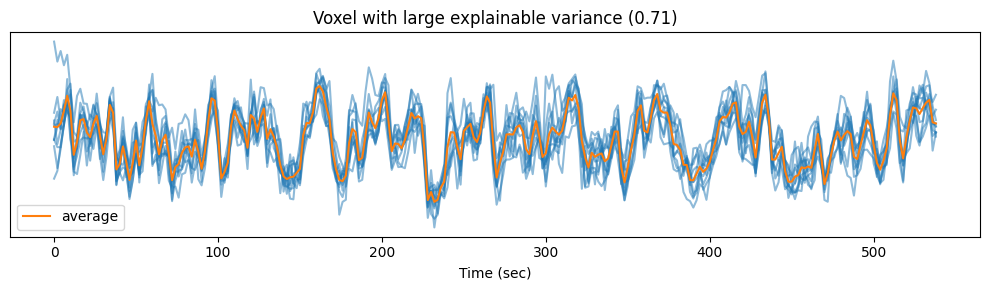

In [11]:
import matplotlib.pyplot as plt

voxel_1 = np.argmax(ev)
time = np.arange(Y_test.shape[1]) * 2  # one time point every 2 seconds
plt.figure(figsize=(10, 3))
plt.plot(time, Y_test[:, :, voxel_1].T, color='C0', alpha=0.5)
plt.plot(time, Y_test[:, :, voxel_1].mean(0), color='C1', label='average')
plt.xlabel("Time (sec)")
plt.title("Voxel with large explainable variance (%.2f)" % ev[voxel_1])
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

... and in a voxel with low explainable variance.



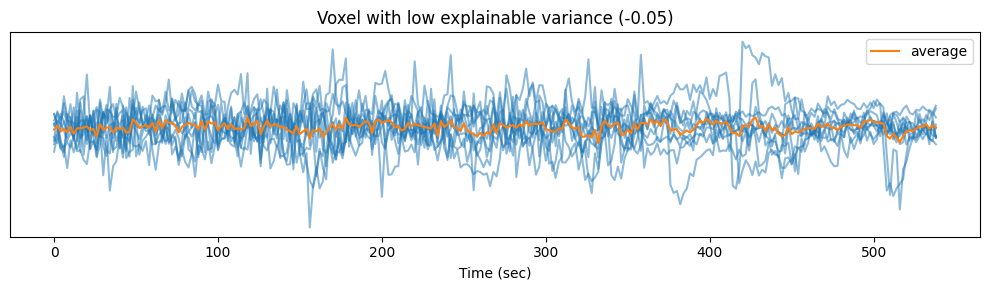

In [12]:
voxel_2 = np.argmin(ev)
plt.figure(figsize=(10, 3))
plt.plot(time, Y_test[:, :, voxel_2].T, color='C0', alpha=0.5)
plt.plot(time, Y_test[:, :, voxel_2].mean(0), color='C1', label='average')
plt.xlabel("Time (sec)")
plt.title("Voxel with low explainable variance (%.2f)" % ev[voxel_2])
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

We can also plot the distribution of explainable variance over voxels.



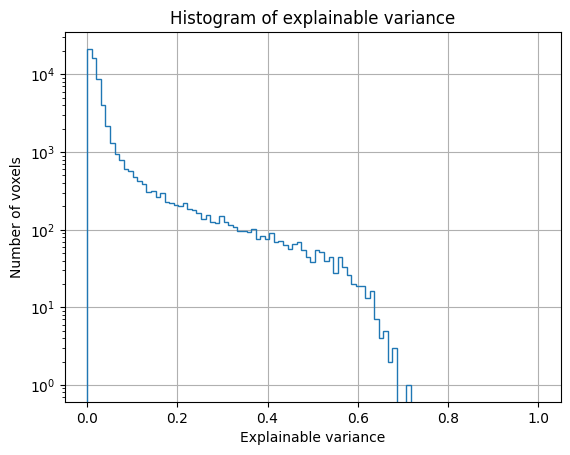

In [13]:
plt.hist(ev, bins=np.linspace(0, 1, 100), log=True, histtype='step')
plt.xlabel("Explainable variance")
plt.ylabel("Number of voxels")
plt.title('Histogram of explainable variance')
plt.grid('on')
plt.show()

We see that many voxels have low explainable variance. This is
expected, since many voxels are not driven by a visual stimulus, and their
response changes over repeats of the same stimulus.
We also see that some voxels have high explainable variance (around 0.7). The
responses in these voxels are highly consistent across repetitions of the
same stimulus. Thus, they are good targets for encoding models.



## Map to subject flatmap

To better understand the distribution of explainable variance, we map the
values to the subject brain. This can be done with [pycortex](https://gallantlab.github.io/pycortex/), which can create interactive 3D
viewers to be displayed in any modern browser. ``pycortex`` can also display
flattened maps of the cortical surface to visualize the entire cortical
surface at once.

Here, we do not share the anatomical information of the subjects for privacy
concerns. Instead, we provide two mappers:

- to map the voxels to a (subject-specific) flatmap
- to map the voxels to the Freesurfer average cortical surface ("fsaverage")

The first mapper is 2D matrix of shape (n_pixels, n_voxels) that maps each
voxel to a set of pixel in a flatmap. The matrix is efficiently stored in a
``scipy`` sparse CSR matrix. The function ``plot_flatmap_from_mapper``
provides an example of how to use the mapper and visualize the flatmap.



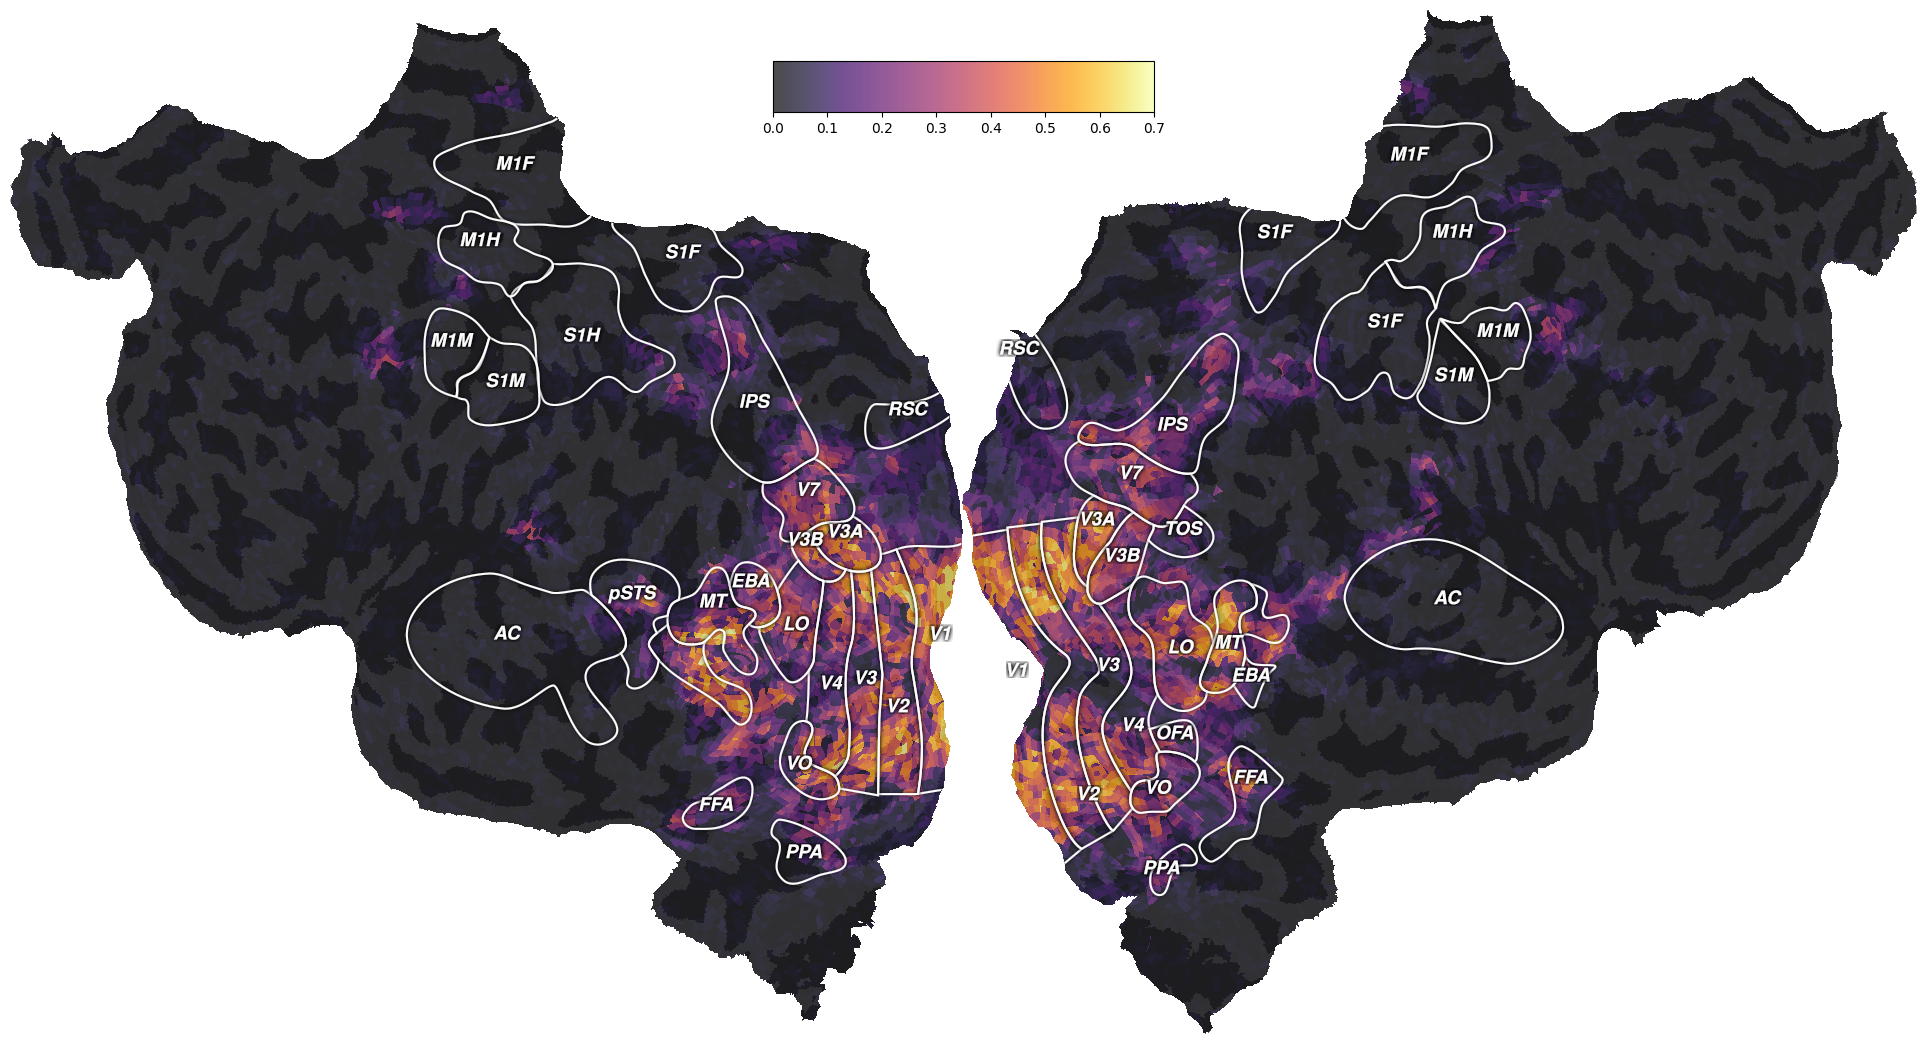

In [14]:
from voxelwise_tutorials.viz import plot_flatmap_from_mapper

mapper_file = os.path.join(directory, 'mappers', f'{subject}_mappers.hdf')
plot_flatmap_from_mapper(ev, mapper_file, vmin=0, vmax=0.7)
plt.show()

This figure is a flattened map of the cortical surface. A number of regions
of interest (ROIs) have been labeled to ease interpretation. If you have
never seen such a flatmap, we recommend taking a look at a [pycortex brain
viewer](https://www.gallantlab.org/brainviewer/Deniz2019), which displays
the brain in 3D. In this viewer, press "I" to inflate the brain, "F" to
flatten the surface, and "R" to reset the view (or use the ``surface/unfold``
cursor on the right menu). Press "H" for a list of all keyboard shortcuts.
This viewer should help you understand the correspondence between the flatten
and the folded cortical surface of the brain.



On this flatmap, we can see that the explainable variance is mainly located
in the visual cortex, in early visual regions like V1, V2, V3, or in
higher-level regions like EBA, FFA or IPS. This is expected since this
dataset contains responses to a visual stimulus.



## Map to "fsaverage"

The second mapper we provide maps the voxel data to a Freesurfer
average surface ("fsaverage"), that can be used in ``pycortex``.

First, let's download the "fsaverage" surface.



In [15]:
import cortex

surface = "fsaverage"

if not hasattr(cortex.db, surface):
    cortex.utils.download_subject(subject_id=surface,
                                  pycortex_store=cortex.db.filestore)
    cortex.db.reload_subjects()  # force filestore reload
    assert hasattr(cortex.db, surface)

Done downloading to /tmp/tmpbau7cnb_/fsaverage.tar.gz
Extracting subject fsaverage to /usr/share/pycortex/db


Then, we load the "fsaverage" mapper. The mapper is a matrix of shape
(n_vertices, n_voxels), which maps each voxel to some vertices in the
fsaverage surface. It is stored as a sparse CSR matrix. The mapper is applied
with a dot product ``@`` (equivalent to ``np.dot``).



In [16]:
from voxelwise_tutorials.io import load_hdf5_sparse_array

voxel_to_fsaverage = load_hdf5_sparse_array(mapper_file,
                                            key='voxel_to_fsaverage')
ev_projected = voxel_to_fsaverage @ ev
print("(n_vertices,) =", ev_projected.shape)

(n_vertices,) = (327684,)


We can then create a ``Vertex`` object in ``pycortex``, containing the
projected data. This object can be used either in a ``pycortex`` interactive
3D viewer, or in a ``matplotlib`` figure showing only the flatmap.



In [17]:
vertex = cortex.Vertex(ev_projected, surface, vmin=0, vmax=0.7, cmap='viridis')

To start an interactive 3D viewer in the browser, we can use the ``webshow``
function in pycortex. (Note that this method works only if you are running the
notebooks locally.) You can start an interactive 3D viewer by changing
``run_webshow`` to ``True`` and running the following cell.



In [ ]:
run_webshow = False
if run_webshow:
    cortex.webshow(vertex, open_browser=False, port=8050)

Alternatively, to plot a flatmap in a ``matplotlib`` figure, use the
`quickshow` function.

(This function requires Inkscape to be installed. The rest of the tutorial
does not use this function, so feel free to ignore.)



Generating a flatmap cache
Failed to get connection
** (inkscape:33767): CRITICAL **: 07:39:29.330: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:33767): CRITICAL **: 07:39:29.330: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:33767): CRITICAL **: 07:39:29.330: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


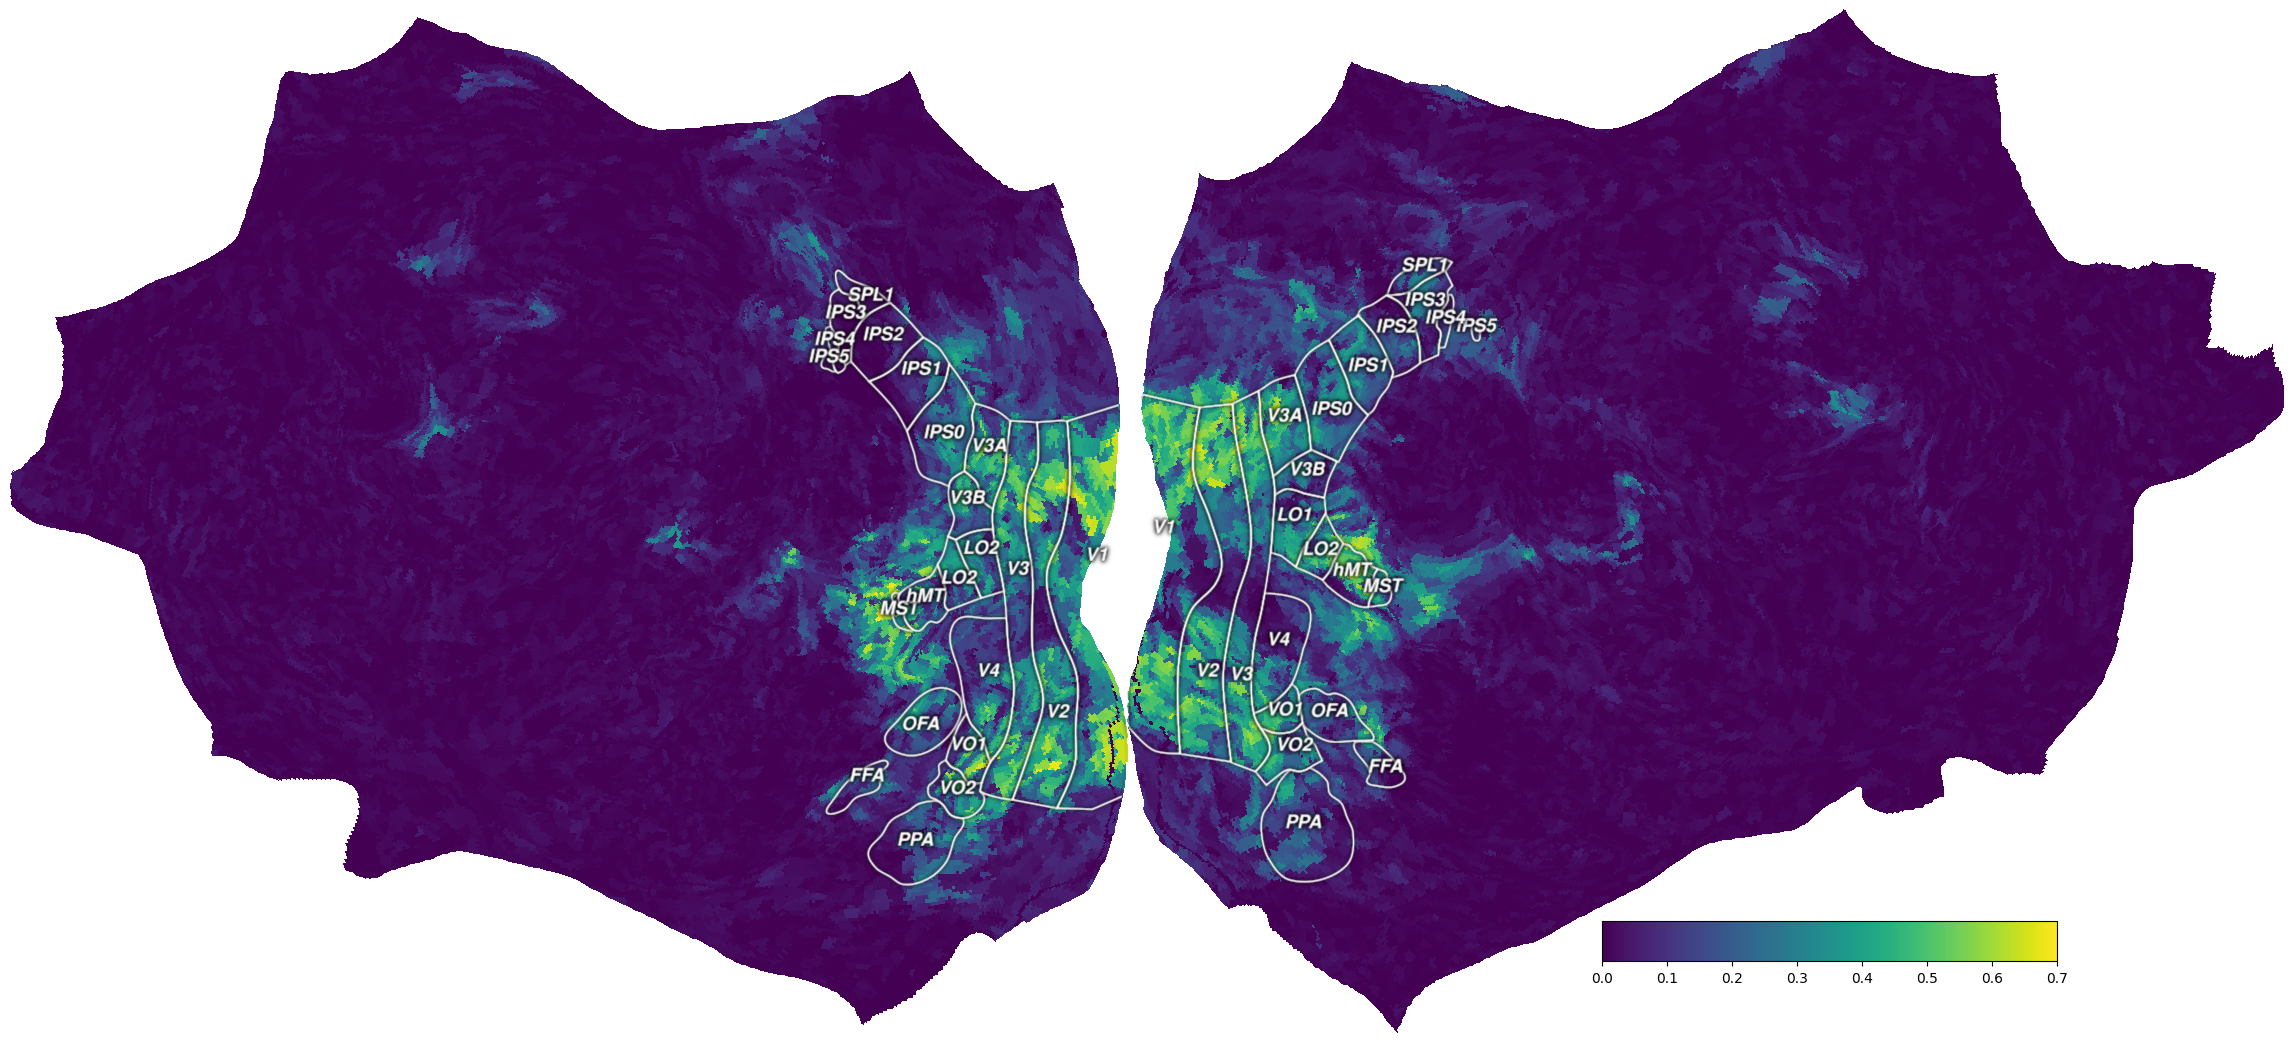

In [18]:
from cortex.testing_utils import has_installed

fig = cortex.quickshow(vertex, colorbar_location='right',
                       with_rois=has_installed("inkscape"))
plt.show()

## References
```{bibliography}
:filter: docname in docnames
```

In [ ]:
%reset -f

# Understand ridge regression and hyperparameter selection

In future examples, we will model the fMRI responses using a regularized linear
regression known as *ridge regression*. This example explains why we use ridge
regression, and how to use cross-validation to select the appropriate
regularization hyperparameter.

Linear regression is a method to model the relation between some input
variables $X \in \mathbb{R}^{(n \times p)}$ (the features) and an output
variable $y \in \mathbb{R}^{n}$ (the target). Specifically, linear
regression uses a vector of coefficient $w \in \mathbb{R}^{p}$ to
predict the output

\begin{align}\hat{y} = Xw\end{align}

The model is considered accurate if the predictions $\hat{y}$ are close
to the true output values $y$. Therefore,  a good linear regression model
is given by the vector $w$ that minimizes the sum of squared errors:

\begin{align}w = \arg\min_w ||Xw - y||^2\end{align}

This is the simplest model for linear regression, and it is known as *ordinary
least squares* (OLS).


## Ordinary least squares (OLS)

To illustrate OLS, let's use a toy dataset with a single features ``X[:,0]``.
On the plot below (left panel), each dot is a sample ``(X[i,0], y[i])``, and
the linear regression model is the line ``y = X[:,0] * w[0]``. On each
sample, the error between the prediction and the true value is shown by a
gray line. By summing the squared errors over all samples, we get the squared
loss. Plotting the squared loss for every value of ``w`` leads to a parabola
(right panel).



In [ ]:
import numpy as np
from voxelwise_tutorials.regression_toy import create_regression_toy
from voxelwise_tutorials.regression_toy import plot_1d

X, y = create_regression_toy(n_features=1)

plot_1d(X, y, w=[0])

By varying the linear coefficient ``w``, we can change the prediction
accuracy of the model, and thus the squared loss.



In [ ]:
plot_1d(X, y, w=[0.2])

In [ ]:
plot_1d(X, y, w=[0.7])

The linear coefficient leading to the minimum squared loss can be found
analytically with the formula:

\begin{align}w = (X^\top X)^{-1}  X^\top y\end{align}

This is the OLS solution.



In [ ]:
w_ols = np.linalg.solve(X.T @ X, X.T @ y)

plot_1d(X, y, w=w_ols)

Linear regression can also be used on more than one feature. On the next toy
dataset, we will use two features ``X[:,0]`` and ``X[:,1]``. The linear
regression model is a now plane. Here again, summing the squared errors over
all samples gives the squared loss.Plotting the squared loss for every value
of ``w[0]`` and ``w[1]`` leads to a 2D parabola (right panel).



In [ ]:
from voxelwise_tutorials.regression_toy import create_regression_toy
from voxelwise_tutorials.regression_toy import plot_2d

X, y = create_regression_toy(n_features=2)

plot_2d(X, y, w=[0, 0], show_noiseless=False)

In [ ]:
plot_2d(X, y, w=[0.4, 0], show_noiseless=False)

In [ ]:
plot_2d(X, y, w=[0, 0.3], show_noiseless=False)

Here again, the OLS solution can be found analytically with the same formula.
Note that the OLS solution is not equal to the ground-truth coefficients used
to generate the toy dataset (black cross), because we added some noise to the
target values ``y``. We want the solution we find to be as close as possible
to the ground-truth coefficients, because it will allow the regression to
generalize correctly to new data.



In [ ]:
w_ols = np.linalg.solve(X.T @ X, X.T @ y)
plot_2d(X, y, w=w_ols)

The situation becomes more interesting when the features in ``X`` are
correlated. Here, we add a correlation between the first feature ``X[:, 0]``
and the second feature ``X[:, 1]``. With this correlation, the squared loss
function is no more isotropic, so the lines of equal loss are now ellipses
instead of circles. Thus, when starting from the OLS solution, moving ``w``
toward the top left leads to a small change in the loss, whereas moving it
toward the top right leads to a large change in the loss. This anisotropy
makes the OLS solution less robust to noise in some particular directions
(deviating more from the ground-truth coefficients).



In [ ]:
X, y = create_regression_toy(n_features=2, correlation=0.9)

w_ols = np.linalg.solve(X.T @ X, X.T @ y)
plot_2d(X, y, w=w_ols)

The different robustness to noise can be understood mathematically by the
fact that the OLS solution requires inverting the matrix $(X^T X)$. The
matrix inversion amounts to inverting the eigenvalues $\lambda_k$ of
the matrix. When the features are highly correlated, some eigenvalues
$\lambda_k$ are close to zero, and a small change in the features can
have a large effect on the inverse. Thus, having small eigenvalues reduces
the stability of the inversion. If the correlation is even higher, the
smallest eigenvalues get closer to zero, and the OLS solution becomes even
less stable.



In [ ]:
X, y = create_regression_toy(n_features=2, correlation=0.999)

w_ols = np.linalg.solve(X.T @ X, X.T @ y)
plot_2d(X, y, w=w_ols)

The instability can become even more pronounced with larger number of
features, or with smaller numbers of samples.



In [ ]:
X, y = create_regression_toy(n_samples=10, n_features=2, correlation=0.999)

w_ols = np.linalg.solve(X.T @ X, X.T @ y)
plot_2d(X, y, w=w_ols)

When the number of features is larger than the number of samples, the linear
system becomes under-determined, which means that the OLS problem has an
infinite number of solutions, most of which do not generalize well to new
data.



## Ridge regression

To solve the instability and under-determinacy issues of OLS, OLS can be
extended to *ridge regression*. Ridge regression considers a different
optimization problem:

\begin{align}w = \arg\min_w ||Xw - y||^2 + \alpha ||w||^2\end{align}

This optimization problem contains two terms: (i) a *data-fitting term*
$||Xw - y||^2$, which ensures the regression correctly fits the
training data; and (ii) a regularization term $\alpha||w||^2$, which
forces the coefficients $w$ to be close to zero. The regularization
term increases the stability of the solution, at the cost of a bias toward
zero.

In the regularization term, ``alpha`` is a positive hyperparameter that
controls the regularization strength. With a smaller ``alpha``, the solution
will be closer to the OLS solution, and with a larger ``alpha``, the solution
will be further from the OLS solution and closer to the origin.

To illustrate this effect, the following plot shows the ridge solution for a
particular value of ``alpha``. The black circle corresponds to the line of
equal regularization, whereas the blue ellipses are the lines of equal
squared loss.



In [ ]:
X, y = create_regression_toy(n_features=2, correlation=0.9)

alpha = 23
w_ridge = np.linalg.solve(X.T @ X + np.eye(X.shape[1]) * alpha, X.T @ y)
plot_2d(X, y, w_ridge, alpha=alpha)

To understand why the regularization term makes the solution more robust to
noise, let's consider the ridge solution. The ridge solution can be found
analytically with the formula:

\begin{align}w = (X^\top X + \alpha I)^{-1}  X^\top y\end{align}

where ``I`` is the identity matrix. In this formula, we can see that the
inverted matrix is now $(X^\top X + \alpha I)$. Compared to OLS, the
additional term $\alpha I$ adds a positive value ``alpha`` to all
eigenvalues $\lambda_k$ of $(X^\top X)$ before the matrix
inversion. Inverting $(\lambda_k + \alpha)$ instead of
$\lambda_k$ reduces the instability caused by small eigenvalues. This
explains why the ridge solution is more robust to noise than the OLS
solution.

In the following plots, we can see that even with a stronger correlation, the
ridge solution is still reasonably close to the noiseless ground truth, while
the OLS solution would be far off.



In [ ]:
X, y = create_regression_toy(n_features=2, correlation=0.999)

alpha = 23
w_ridge = np.linalg.solve(X.T @ X + np.eye(X.shape[1]) * alpha, X.T @ y)
plot_2d(X, y, w_ridge, alpha=alpha)

Changing the regularization hyperparameter $\alpha$ leads to another
ridge solution.



In [ ]:
X, y = create_regression_toy(n_features=2, correlation=0.999)

alpha = 200
w_ridge = np.linalg.solve(X.T @ X + np.eye(X.shape[1]) * alpha, X.T @ y)
plot_2d(X, y, w_ridge, alpha=alpha)

Side note: For every $\alpha$, at the corresponding ridge solution, the
line of equal regularization and the line of equal loss are tangent. If the
two lines were crossing, one could improve the ridge solution by moving along
one line. It would improve one term while keeping the other term constant.



## Hyperparameter selection
One issue with ridge regression is that the hyperparameter $\alpha$ is
arbitrary. Different choices of hyperparameter lead to different models. To
compare these models, we cannot compare the ability to fit the training data,
because the best model would just be OLS ($alpha = 0$). Instead, we
want to compare the ability of each model to generalize to new data. To
estimate a model ability to generalize, we can compute its prediction
accuracy on a separate dataset that was not used during the model fitting
(i.e. not used to find the coefficients $w$).

To illustrate this idea, we can split the data into two subsets.



In [ ]:
from voxelwise_tutorials.regression_toy import create_regression_toy
from voxelwise_tutorials.regression_toy import plot_kfold2

X, y = create_regression_toy(n_features=1)

plot_kfold2(X, y, fit=False)

Then, we can fit a model on each subset.



In [ ]:
alpha = 0.1
plot_kfold2(X, y, alpha, fit=True)

And compute the prediction accuracy of each model on the other subset.



In [ ]:
plot_kfold2(X, y, alpha, fit=True, flip=True)

In this way, we can evaluate the ridge regression (fit with a specific
$\alpha$) on its ability to generalize to new data. If we do that for
different hyperparameter candidates $\alpha$, we can select the model
leading to the best out-of-set prediction accuracy.



In [ ]:
from voxelwise_tutorials.regression_toy import plot_cv_path

noise = 0.1
X, y = create_regression_toy(n_features=2, noise=noise)
plot_cv_path(X, y)

In the example above, the noise level is low, so the best hyperparameter
alpha is close to zero, and ridge regression is not much better than OLS.
However, if the dataset has more noise, a lower number of samples, or more
correlated features, the best hyperparameter can be higher. In this case,
ridge regression is better than OLS.



In [ ]:
noise = 3
X, y = create_regression_toy(n_features=2, noise=noise)
plot_cv_path(X, y)

When the noise level is too high, the best hyperparameter can be the largest
on the grid. It either means that the grid is too small, or that the
regression does not find a predictive link between the features and the
target. In this case, the model with the lowest generalization error always
predict zero ($w=0$).



In [ ]:
noise = 100
X, y = create_regression_toy(n_features=2, noise=noise)
plot_cv_path(X, y)

To summarize, to select the best hyperparameter $\alpha$, the standard
method is to perform a grid search:

  - Split the training set into two subsets: one subset used to fit the
    models, and one subset to estimate the prediction accuracy (*validation
    set*)
  - Define a number of hyperparameter candidates, for example [0.1, 1, 10,
    100].
  - Fit a separate ridge model with each hyperparameter candidate
    $\alpha$.
  - Compute the prediction accuracy on the validation set.
  - Select the hyperparameter candidate leading to the best validation
    accuracy.

To make the grid search less sensitive to the choice of how the training data
was split, the process can be repeated for multiple splits. Then, the
different prediction accuracies can be averaged over splits before the
hyperparameter selection. Thus, the process is called a *cross-validation*.

Learn more about hyperparameter selection and cross-validation on the
[scikit-learn documentation](https://scikit-learn.org/stable/modules/cross_validation.html).



In [ ]:
%reset -f

# Fit a voxelwise encoding model with WordNet features

In this example, we model the fMRI responses with semantic "wordnet" features,
manually annotated on each frame of the movie stimulus. The model is a
regularized linear regression model, known as ridge regression. Since this
model is used to predict brain activity from the stimulus, it is called a
(voxelwise) encoding model.

This example reproduces part of the analysis described in {cite:t}`huth2012`. See the original publication for more details about the experiment, the wordnet
features, along with more results and more discussions.

*WordNet features:* The features used in this example are semantic labels
manually annotated on each frame of the movie stimulus. The semantic labels
include nouns (such as "woman", "car", or "building") and verbs (such as
"talking", "touching", or "walking"), for a total of 1705 distinct category
labels. To interpret our model, labels can be organized in a graph of semantic
relationship based on the [WordNet](https://wordnet.princeton.edu/) dataset.

*Summary:* We first concatenate the features with multiple temporal delays to
account for the slow hemodynamic response. We then use linear regression to fit
a predictive model of brain activity. The linear regression is regularized to
improve robustness to correlated features and to improve generalization
performance. The optimal regularization hyperparameter is selected over a
grid-search with cross-validation. Finally, the model generalization
performance is evaluated on a held-out test set, comparing the model
predictions to the corresponding ground-truth fMRI responses.

:::{note}
It should take less than 5 minutes to run the model fitting in this tutorial on a GPU. If you are using a CPU, it may take longer.
:::

## Path of the data directory



In [ ]:
from voxelwise_tutorials.io import get_data_home
directory = get_data_home(dataset="shortclips")
print(directory)

In [ ]:
# modify to use another subject
subject = "S01"

## Load the data

We first load the fMRI responses. These responses have been preprocessed as
described in {cite:t}`huth2012`. The data is separated into a training set ``Y_train`` and a
testing set ``Y_test``. The training set is used for fitting models, and
selecting the best models and hyperparameters. The test set is later used
to estimate the generalization performance of the selected model. The
test set contains multiple repetitions of the same experiment to estimate
an upper bound of the model prediction accuracy (cf. previous example).

In [ ]:
import os
import numpy as np
from voxelwise_tutorials.io import load_hdf5_array

file_name = os.path.join(directory, "responses", f"{subject}_responses.hdf")
Y_train = load_hdf5_array(file_name, key="Y_train")
Y_test = load_hdf5_array(file_name, key="Y_test")

print("(n_samples_train, n_voxels) =", Y_train.shape)
print("(n_repeats, n_samples_test, n_voxels) =", Y_test.shape)

Before fitting an encoding model, the fMRI responses are typically z-scored over time. This normalization step is performed for two reasons.
First, the regularized regression methods used to estimate encoding models generally assume the data to be normalized {cite}`Hastie2009`.
Second, the temporal mean and standard deviation of a voxel are typically considered uninformative in fMRI because they can vary due to factors unrelated to the task, such as differences in signal-to-noise ratio (SNR).

To preserve each run independent from the others, we z-score each run separately.

In [ ]:
from scipy.stats import zscore
from voxelwise_tutorials.utils import zscore_runs

# indice of first sample of each run
run_onsets = load_hdf5_array(file_name, key="run_onsets")
print(run_onsets)

# zscore each training run separately
Y_train = zscore_runs(Y_train, run_onsets)
# zscore each test run separately
Y_test = zscore(Y_test, axis=1)

If we repeat an experiment multiple times, part of the fMRI responses might
change. However the modeling features do not change over the repeats, so the
voxelwise encoding model will predict the same signal for each repeat. To
have an upper bound of the model prediction accuracy, we keep only the
repeatable part of the signal by averaging the test repeats.



In [ ]:
Y_test = Y_test.mean(0)
# We need to zscore the test data again, because we took the mean across repetitions.
Y_test = zscore(Y_test, axis=0)

print("(n_samples_test, n_voxels) =", Y_test.shape)

We fill potential NaN (not-a-number) values with zeros.



In [ ]:
Y_train = np.nan_to_num(Y_train)
Y_test = np.nan_to_num(Y_test)

Then, we load the semantic "wordnet" features, extracted from the stimulus at
each time point. The features corresponding to the training set are noted
``X_train``, and the features corresponding to the test set are noted
``X_test``.



In [ ]:
feature_space = "wordnet"

file_name = os.path.join(directory, "features", f"{feature_space}.hdf")
X_train = load_hdf5_array(file_name, key="X_train")
X_test = load_hdf5_array(file_name, key="X_test")

print("(n_samples_train, n_features) =", X_train.shape)
print("(n_samples_test, n_features) =", X_test.shape)

## Define the cross-validation scheme

To select the best hyperparameter through cross-validation, we must define a
cross-validation splitting scheme. Because fMRI time-series are
autocorrelated in time, we should preserve as much as possible the temporal
correlation. In other words, because consecutive time samples are correlated,
we should not put one time sample in the training set and the immediately
following time sample in the validation set. Thus, we define here a
leave-one-run-out cross-validation split that keeps each recording run
intact.

We define a cross-validation splitter, compatible with ``scikit-learn`` API.

In [ ]:
from sklearn.model_selection import check_cv
from voxelwise_tutorials.utils import generate_leave_one_run_out

n_samples_train = X_train.shape[0]
cv = generate_leave_one_run_out(n_samples_train, run_onsets)
cv = check_cv(cv)  # copy the cross-validation splitter into a reusable list

## Define the model

Now, let's define the model pipeline.

With regularized linear regression models, it is generally recommended to normalize
(z-score) both the responses and the features before fitting the model {cite}`Hastie2009`.
Z-scoring corresponds to removing the temporal mean and dividing by the temporal standard deviation.
We already z-scored the fMRI responses after loading them, so now we need to specify
in the model how to deal with the features.

We first center the features, since we will not use an intercept. The mean
value in fMRI recording is non-informative, so each run is detrended and
demeaned independently, and we do not need to predict an intercept value in
the linear model.

For this particular dataset and example, we do not normalize by the standard deviation
of each feature. If the features are extracted in a consistent way from the stimulus,
their relative scale is meaningful. Normalizing them independently from each
other would remove this information. Moreover, the wordnet features are
one-hot-encoded, which means that each feature is either present (1) or not
present (0) in each sample. Normalizing one-hot-encoded features is not
recommended, since it would scale disproportionately the infrequent features.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=False)

Then we concatenate the features with multiple delays to account for the
hemodynamic response. Due to neurovascular coupling, the recorded BOLD signal
is delayed in time with respect to the stimulus onset. With different delayed
versions of the features, the linear regression model will weigh each delayed
feature with a different weight to maximize the predictions. With a sample
every 2 seconds, we typically use 4 delays `[1, 2, 3, 4]` to cover the
hemodynamic response peak. In the next example, we further describe this
hemodynamic response estimation.



In [ ]:
from voxelwise_tutorials.delayer import Delayer
delayer = Delayer(delays=[1, 2, 3, 4])

Finally, we use a ridge regression model. Ridge regression is a linear
regression with L2 regularization. The L2 regularization improves robustness
to correlated features and improves generalization performance. The L2
regularization is controlled by a hyperparameter ``alpha`` that needs to be
tuned for each dataset. This regularization hyperparameter is usually
selected over a grid search with cross-validation, selecting the
hyperparameter that maximizes the predictive performances on the validation
set. See the previous example for more details about ridge regression and
hyperparameter selection.

For computational reasons, when the number of features is larger than the
number of samples, it is more efficient to solve ridge regression using the
(equivalent) dual formulation {cite}`saunders1998`. This dual formulation is equivalent to
kernel ridge regression with a linear kernel. Here, we have 3600 training
samples, and 1705 * 4 = 6820 features (we multiply by 4 since we use 4 time
delays), therefore it is more efficient to use kernel ridge regression.

With one target, we could directly use the pipeline in ``scikit-learn``'s
``GridSearchCV``, to select the optimal regularization hyperparameter
(``alpha``) over cross-validation. However, ``GridSearchCV`` can only
optimize a single score across all voxels (targets). Thus, in the
multiple-target case, ``GridSearchCV`` can only optimize (for example) the
mean score over targets. Here, we want to find a different optimal
hyperparameter per target/voxel, so we use the package [himalaya](https://github.com/gallantlab/himalaya) which implements a
``scikit-learn`` compatible estimator ``KernelRidgeCV``, with hyperparameter
selection independently on each target.



In [ ]:
from himalaya.kernel_ridge import KernelRidgeCV

``himalaya`` implements different computational backends,
including two backends that use GPU for faster computations. The two
available GPU backends are "torch_cuda" and "cupy". (Each backend is only
available if you installed the corresponding package with CUDA enabled. Check
the ``pytorch``/``cupy`` documentation for install instructions.)

Here we use the "torch_cuda" backend, but if the import fails we continue
with the default "numpy" backend. The "numpy" backend is expected to be
slower since it only uses the CPU.



In [ ]:
from himalaya.backend import set_backend
backend = set_backend("torch_cuda", on_error="warn")
print(backend)

To speed up model fitting on GPU, we use single precision float numbers.
(This step probably does not change significantly the performances on non-GPU
backends.)



In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

Since the scale of the regularization hyperparameter ``alpha`` is unknown, we
use a large logarithmic range, and we will check after the fit that best
hyperparameters are not all on one range edge.



In [ ]:
alphas = np.logspace(1, 20, 20)

We also indicate some batch sizes to limit the GPU memory.



In [ ]:
kernel_ridge_cv = KernelRidgeCV(
    alphas=alphas, cv=cv,
    solver_params=dict(n_targets_batch=500, n_alphas_batch=5,
                       n_targets_batch_refit=100))

Finally, we use a ``scikit-learn`` ``Pipeline`` to link the different steps
together. A ``Pipeline`` can be used as a regular estimator, calling
``pipeline.fit``, ``pipeline.predict``, etc. Using a ``Pipeline`` can be
useful to clarify the different steps, avoid cross-validation mistakes, or
automatically cache intermediate results. See the ``scikit-learn``
[documentation](https://scikit-learn.org/stable/modules/compose.html) for
more information.



In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    scaler,
    delayer,
    kernel_ridge_cv,
)

We can display the ``scikit-learn`` pipeline with an HTML diagram.



In [ ]:
from sklearn import set_config
set_config(display='diagram')  # requires scikit-learn 0.23
pipeline

## Fit the model

We fit on the training set..



In [ ]:
_ = pipeline.fit(X_train, Y_train)

..and score on the test set. Here the scores are the $R^2$ scores, with
values in $]-\infty, 1]$. A value of $1$ means the predictions
are perfect.

Note that since ``himalaya`` is implementing multiple-targets
models, the ``score`` method differs from ``scikit-learn`` API and returns
one score per target/voxel.



In [ ]:
scores = pipeline.score(X_test, Y_test)
print("(n_voxels,) =", scores.shape)

If we fit the model on GPU, scores are returned on GPU using an array object
specific to the backend we used (such as a ``torch.Tensor``). Thus, we need to
move them into ``numpy`` arrays on CPU, to be able to use them for example in
a ``matplotlib`` figure.



In [ ]:
scores = backend.to_numpy(scores)

## Plot the model prediction accuracy

To visualize the model prediction accuracy, we can plot it for each voxel on
a flattened surface of the brain. To do so, we use a mapper that is specific
to the each subject's brain. (Check previous example to see how to use the
mapper to Freesurfer average surface.)



In [ ]:
import matplotlib.pyplot as plt
from voxelwise_tutorials.viz import plot_flatmap_from_mapper

mapper_file = os.path.join(directory, "mappers", f"{subject}_mappers.hdf")
ax = plot_flatmap_from_mapper(scores, mapper_file, vmin=0, vmax=0.4)
plt.show()

We can see that the "wordnet" features successfully predict part of the
measured brain activity, with $R^2$ scores as high as 0.4. Note that
these scores are generalization scores, since they are computed on a test set
that was not used during model fitting. Since we fitted a model independently
in each voxel, we can inspect the generalization performances at the best
available spatial resolution: individual voxels.

The best-predicted voxels are located in visual semantic areas like EBA, or
FFA. This is expected since the wordnet features encode semantic information
about the visual stimulus. For more discussions about these results, we refer
the reader to the original publication {cite}`huth2012`.



## Plot the selected hyperparameters

Since the scale of alphas is unknown, we plot the optimal alphas selected by
the solver over cross-validation. This plot is helpful to refine the alpha
grid if the range is too small or too large.

Note that some voxels might be at the maximum regularization value in the
grid search. These are voxels where the model has no predictive power, thus
the optimal regularization parameter is large to lead to a prediction equal
to zero. We do not need to extend the alpha range for these voxels.



In [ ]:
from himalaya.viz import plot_alphas_diagnostic
best_alphas = backend.to_numpy(pipeline[-1].best_alphas_)
plot_alphas_diagnostic(best_alphas=best_alphas, alphas=alphas)
plt.show()

## Visualize the regression coefficients

Here, we go back to the main model on all voxels. Since our model is linear,
we can use the (primal) regression coefficients to interpret the model. The
basic intuition is that the model will use larger coefficients on features
that have more predictive power.

Since we know the meaning of each feature, we can interpret the large
regression coefficients. In the case of wordnet features, we can even build a
graph that represents the features that are linked by a semantic
relationship.



We first get the (primal) ridge regression coefficients from the fitted
model.



In [ ]:
primal_coef = pipeline[-1].get_primal_coef()
primal_coef = backend.to_numpy(primal_coef)
print("(n_delays * n_features, n_voxels) =", primal_coef.shape)

Because the ridge model allows a different regularization per voxel, the
regression coefficients may have very different scales. In turn, these
different scales can introduce a bias in the interpretation, focusing the
attention disproportionately on voxels fitted with the lowest alpha. To
address this issue, we rescale the regression coefficient to have a norm
equal to the square-root of the $R^2$ scores. We found empirically that
this rescaling best matches results obtained with a regularization shared
across voxels. This rescaling also removes the need to select only best
performing voxels, because voxels with low prediction accuracies are rescaled
to have a low norm.



In [ ]:
primal_coef /= np.linalg.norm(primal_coef, axis=0)[None]
primal_coef *= np.sqrt(np.maximum(0, scores))[None]

Then, we aggregate the coefficients across the different delays.



In [ ]:
# split the ridge coefficients per delays
delayer = pipeline.named_steps['delayer']
primal_coef_per_delay = delayer.reshape_by_delays(primal_coef, axis=0)
print("(n_delays, n_features, n_voxels) =", primal_coef_per_delay.shape)
del primal_coef

# average over delays
average_coef = np.mean(primal_coef_per_delay, axis=0)
print("(n_features, n_voxels) =", average_coef.shape)
del primal_coef_per_delay

Even after averaging over delays, the coefficient matrix is still too large
to interpret it. Therefore, we use principal component analysis (PCA) to
reduce the dimensionality of the matrix.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(average_coef.T)
components = pca.components_
print("(n_components, n_features) =", components.shape)

We can check the ratio of explained variance by each principal component.
We see that the first four components already explain a large part of the
coefficients variance.



In [ ]:
print("PCA explained variance =", pca.explained_variance_ratio_)

Similarly to {cite:t}`huth2012`, we correct the coefficients of features linked by a
semantic relationship. When building the wordnet features, if a frame was
labeled with `wolf`, the authors automatically added the semantically linked
categories `canine`, `carnivore`, `placental mammal`, `mammal`, `vertebrate`,
`chordate`, `organism`, and `whole`. The authors thus argue that the same
correction needs to be done on the coefficients.



In [ ]:
from voxelwise_tutorials.wordnet import load_wordnet
from voxelwise_tutorials.wordnet import correct_coefficients
_, wordnet_categories = load_wordnet(directory=directory)
components = correct_coefficients(components.T, wordnet_categories).T
components -= components.mean(axis=1)[:, None]
components /= components.std(axis=1)[:, None]

Finally, we plot the first principal component on the wordnet graph. In such
graph, edges indicate "is a" relationships (e.g. an `athlete` "is a"
`person`). Each marker represents a single noun (circle) or verb (square).
The area of each marker indicates the principal component magnitude, and the
color indicates the sign (red is positive, blue is negative).



In [ ]:
from voxelwise_tutorials.wordnet import plot_wordnet_graph
from voxelwise_tutorials.wordnet import apply_cmap

first_component = components[0]
node_sizes = np.abs(first_component)
node_colors = apply_cmap(first_component, vmin=-2, vmax=2, cmap='coolwarm',
                         n_colors=2)

plot_wordnet_graph(node_colors=node_colors, node_sizes=node_sizes)
plt.show()

According to {cite:t}`huth2012`, "this principal component distinguishes
between categories with high stimulus energy (e.g. moving objects like
`person` and `vehicle`) and those with low stimulus energy (e.g. stationary
objects like `sky` and `city`)".

In this example, because we use only a single subject and we perform a
different voxel selection, our result is slightly different than in the
original publication. We also use a different regularization parameter in
each voxel, while in {cite:t}`huth2012` all voxels had the same regularization parameter.
However, we do not aim at reproducing exactly the results of the original
publication, but we rather describe the general approach.



To project the principal component on the cortical surface, we first need to
use the fitted PCA to transform the primal weights of all voxels.



In [ ]:
# transform with the fitted PCA
average_coef_transformed = pca.transform(average_coef.T).T
print("(n_components, n_voxels) =", average_coef_transformed.shape)
del average_coef

# We make sure vmin = -vmax, so that the colormap is centered on 0.
vmax = np.percentile(np.abs(average_coef_transformed), 99.9)

# plot the primal weights projected on the first principal component.
ax = plot_flatmap_from_mapper(average_coef_transformed[0], mapper_file,
                              vmin=-vmax, vmax=vmax, cmap='coolwarm')
plt.show()

This flatmap shows in which brain regions the model has the largest
projection on the first component. Again, this result is different from the
one in {cite:t}`huth2012`, and should only be considered as reproducing the general
approach.



Following the analyses in the original publication, we also plot the next three principal components on the
wordnet graph, mapping the three vectors to RGB colors.



In [ ]:
from voxelwise_tutorials.wordnet import scale_to_rgb_cube

next_three_components = components[1:4].T
node_sizes = np.linalg.norm(next_three_components, axis=1)
node_colors = scale_to_rgb_cube(next_three_components)
print("(n_nodes, n_channels) =", node_colors.shape)

plot_wordnet_graph(node_colors=node_colors, node_sizes=node_sizes)
plt.show()

According to {cite:t}`huth2012`, "this graph shows that categories thought
to be semantically related (e.g. athletes and walking) are represented
similarly in the brain".



Finally, we project these principal components on the cortical surface.



In [ ]:
from voxelwise_tutorials.viz import plot_3d_flatmap_from_mapper

voxel_colors = scale_to_rgb_cube(average_coef_transformed[1:4].T, clip=3).T
print("(n_channels, n_voxels) =", voxel_colors.shape)

ax = plot_3d_flatmap_from_mapper(
    voxel_colors[0], voxel_colors[1], voxel_colors[2],
    mapper_file=mapper_file,
    vmin=0, vmax=1, vmin2=0, vmax2=1, vmin3=0, vmax3=1
)
plt.show()

Again, our results are different from the ones in {cite:t}`huth2012`, for the same reasons
mentioned earlier.



## References

```{bibliography}
:filter: docname in docnames
```

In [ ]:
%reset -f


# Visualize the hemodynamic response

In this example, we describe how the hemodynamic response function was
estimated in the previous model. We fit the same ridge model as in the previous
example, and further describe the need to delay the features in time to account
for the delayed BOLD response.

Because of the temporal dynamics of neurovascular coupling, the recorded BOLD
signal is delayed in time with respect to the stimulus. To account for this
lag, we fit encoding models on delayed features. In this way, the linear
regression model weighs each delayed feature separately and recovers the shape
of the hemodynamic response function in each voxel separately. In turn, this
method (also known as a Finite Impulse Response model, or FIR) maximizes the
model prediction accuracy. With a repetition time of 2 seconds, we typically
use 4 delays `[1, 2, 3, 4]` to cover the peak of the the hemodynamic response
function. However, the optimal number of delays can vary depending on the
experiment and the brain area of interest, so you should experiment with
different delays.

In this example, we show that a model without delays performs far worse than a
model with delays. We also show how to visualize the estimated hemodynamic
response function (HRF) from a model with delays.


## Path of the data directory



In [ ]:
from voxelwise_tutorials.io import get_data_home

directory = get_data_home(dataset="shortclips")
print(directory)

In [ ]:
# modify to use another subject
subject = "S01"

## Load the data

We first load and normalize the fMRI responses.

In [ ]:
import os
import numpy as np
from scipy.stats import zscore
from voxelwise_tutorials.io import load_hdf5_array
from voxelwise_tutorials.utils import zscore_runs

file_name = os.path.join(directory, "responses", f"{subject}_responses.hdf")
Y_train = load_hdf5_array(file_name, key="Y_train")
Y_test = load_hdf5_array(file_name, key="Y_test")

print("(n_samples_train, n_voxels) =", Y_train.shape)
print("(n_repeats, n_samples_test, n_voxels) =", Y_test.shape)

# indice of first sample of each run
run_onsets = load_hdf5_array(file_name, key="run_onsets")

# zscore each training run separately
Y_train = zscore_runs(Y_train, run_onsets)
# zscore each test run separately
Y_test = zscore(Y_test, axis=1)

We average the test repeats, to remove the non-repeatable part of fMRI
responses, and normalize the average across repeats.

In [ ]:
Y_test = Y_test.mean(0)
Y_test = zscore(Y_test, axis=0)

print("(n_samples_test, n_voxels) =", Y_test.shape)

We fill potential NaN (not-a-number) values with zeros.



In [ ]:
Y_train = np.nan_to_num(Y_train)
Y_test = np.nan_to_num(Y_test)

Then, we load the semantic "wordnet" features.



In [ ]:
feature_space = "wordnet"

file_name = os.path.join(directory, "features", f"{feature_space}.hdf")
X_train = load_hdf5_array(file_name, key="X_train")
X_test = load_hdf5_array(file_name, key="X_test")

print("(n_samples_train, n_features) =", X_train.shape)
print("(n_samples_test, n_features) =", X_test.shape)

## Define the cross-validation scheme

We define the same leave-one-run-out cross-validation split as in the
previous example.

We define a cross-validation splitter, compatible with ``scikit-learn`` API.

In [ ]:
from sklearn.model_selection import check_cv
from voxelwise_tutorials.utils import generate_leave_one_run_out

n_samples_train = X_train.shape[0]
cv = generate_leave_one_run_out(n_samples_train, run_onsets)
cv = check_cv(cv)  # copy the cross-validation splitter into a reusable list

## Define the model

We define the same model as in the previous example. See the previous
example for more details about the model definition.



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from voxelwise_tutorials.delayer import Delayer
from himalaya.kernel_ridge import KernelRidgeCV
from himalaya.ridge import RidgeCV
from himalaya.backend import set_backend

backend = set_backend("torch_cuda", on_error="warn")

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

alphas = np.logspace(1, 20, 20)

pipeline = make_pipeline(
    StandardScaler(with_mean=True, with_std=False),
    Delayer(delays=[1, 2, 3, 4]),
    KernelRidgeCV(
        alphas=alphas,
        cv=cv,
        solver_params=dict(
            n_targets_batch=500, n_alphas_batch=5, n_targets_batch_refit=100
        ),
    ),
)

In [ ]:
from sklearn import set_config

set_config(display="diagram")  # requires scikit-learn 0.23
pipeline

## Fit the model

We fit on the train set, and score on the test set.



In [ ]:
pipeline.fit(X_train, Y_train)

scores = pipeline.score(X_test, Y_test)
scores = backend.to_numpy(scores)
print("(n_voxels,) =", scores.shape)

## Understanding delays

To have an intuitive understanding of what we accomplish by delaying the
features before model fitting, we will simulate one voxel and a single
feature. We will then create a ``Delayer`` object (which was used in the
previous pipeline) and visualize its effect on our single feature.

Let's start by simulating the data. We assume a simple scenario in which an event in
our experiment occurred at $t = 20$ seconds and lasted for 10 seconds. For each timepoint, our simulated feature
is a simple variable that indicates whether the event occurred or not.

In [ ]:
from voxelwise_tutorials.delays_toy import create_voxel_data

# simulate an activation pulse at 20 s for 10 s of duration
simulated_X, simulated_Y, times = create_voxel_data(onset=20, duration=10)

We next plot the simulated data. In this toy example, we assumed a "canonical"
hemodynamic response function (HRF) (a double gamma function). This is an idealized
HRF that is often used in the literature to model the BOLD response. In practice,
however, the HRF can vary significantly across brain areas.

Because of the HRF, notice that even though the event occurred at $t = 20$ seconds,
the BOLD response is delayed in time.

In [ ]:
import matplotlib.pyplot as plt
from voxelwise_tutorials.delays_toy import plot_delays_toy

plot_delays_toy(simulated_X, simulated_Y, times)
plt.show()

We next create a `Delayer` object and use it to delay the simulated feature.
The effect of the delayer is clear: it creates multiple
copies of the original feature shifted forward in time by how many samples we
requested (in this case, from 0 to 4 samples, which correspond to 0, 2, 4, 6,
and 8 s in time with a 2 s TR).

When these delayed features are used to fit a voxelwise encoding model, the
brain response $y$ at time $t$ is simultaneously modeled by the
feature $x$ at times $t-0, t-2, t-4, t-6, t-8$. For example, the time sample highlighted
in the plot below ($t = 30$ seconds) is modeled by the features at
$t = 30, 28, 26, 24, 22$ seconds.

In [ ]:
# create a delayer object and delay the features
delayer = Delayer(delays=[0, 1, 2, 3, 4])
simulated_X_delayed = delayer.fit_transform(simulated_X[:, None])

# plot the simulated data and highlight t = 30
plot_delays_toy(simulated_X_delayed, simulated_Y, times, highlight=30)
plt.show()

This simple example shows how the delayed features take into account of the HRF.
This approach is often referred to as a "finite impulse response" (FIR) model.
By delaying the features, the regression model learns the weights for each voxel
separately. Therefore, the FIR approach is able to adapt to the shape of the HRF in each
voxel, without assuming a fixed canonical HRF shape.
As we will see in the remaining of this notebook, this approach improves model
prediction accuracy significantly.

## Compare with a model without delays

We define here another model without feature delays (i.e. no ``Delayer``).
Because the BOLD signal is inherently slow due to the dynamics of
neuro-vascular coupling, this model is unlikely to perform well.

Note that if we remove the feature delays, we will have more fMRI samples
(3600) than number of features (1705). In this case, running a kernel version
of ridge regression is computationally suboptimal. Thus, to create a model
without delays we are using `RidgeCV` instead of `KernelRidgeCV`.



In [ ]:
pipeline_no_delay = make_pipeline(
    StandardScaler(with_mean=True, with_std=False),
    RidgeCV(
        alphas=alphas,
        cv=cv,
        solver="svd",
        solver_params=dict(
            n_targets_batch=500, n_alphas_batch=5, n_targets_batch_refit=100
        ),
    ),
)
pipeline_no_delay

We fit and score the model as the previous one.



In [ ]:
pipeline_no_delay.fit(X_train, Y_train)
scores_no_delay = pipeline_no_delay.score(X_test, Y_test)
scores_no_delay = backend.to_numpy(scores_no_delay)
print("(n_voxels,) =", scores_no_delay.shape)

Then, we plot the comparison of model prediction accuracies with a 2D
histogram. All ~70k voxels are represented in this histogram, where the
diagonal corresponds to identical prediction accuracy for both models. A
distribution deviating from the diagonal means that one model has better
prediction accuracy than the other.



In [ ]:
from voxelwise_tutorials.viz import plot_hist2d

ax = plot_hist2d(scores_no_delay, scores)
ax.set(
    title="Generalization R2 scores",
    xlabel="model without delays",
    ylabel="model with delays",
)
plt.show()

We see that the model with delays performs much better than the model without
delays. This can be seen in voxels with scores above 0. The distribution
of scores below zero is not very informative, since it corresponds to voxels
with poor predictive performance anyway, and it only shows which model is
overfitting the most.



## Visualize the HRF

We just saw that delays are necessary to model BOLD responses. Here we show
how the fitted ridge regression weights follow the hemodynamic response
function (HRF).

Fitting a kernel ridge regression results in a set of coefficients called the
"dual" coefficients $w$. These coefficients differ from the "primal"
coefficients $\beta$ obtained with a ridge regression, but the primal
coefficients can be computed from the dual coefficients using the training
features $X$:

\begin{align}\beta = X^\top w\end{align}

To better visualize the HRF, we will refit a model with more delays, but only
on a selection of voxels to speed up the computations.



In [ ]:
# pick the 10 best voxels
voxel_selection = np.argsort(scores)[-10:]

# define a pipeline with more delays
pipeline_more_delays = make_pipeline(
    StandardScaler(with_mean=True, with_std=False),
    Delayer(delays=[0, 1, 2, 3, 4, 5, 6]),
    KernelRidgeCV(
        alphas=alphas,
        cv=cv,
        solver_params=dict(
            n_targets_batch=500, n_alphas_batch=5, n_targets_batch_refit=100
        ),
    ),
)

pipeline_more_delays.fit(X_train, Y_train[:, voxel_selection])

# get the (primal) ridge regression coefficients
primal_coef = pipeline_more_delays[-1].get_primal_coef()
primal_coef = backend.to_numpy(primal_coef)

# split the ridge coefficients per delays
delayer = pipeline_more_delays.named_steps["delayer"]
primal_coef_per_delay = delayer.reshape_by_delays(primal_coef, axis=0)
print("(n_delays, n_features, n_voxels) =", primal_coef_per_delay.shape)

# select the feature with the largest coefficients for each voxel
feature_selection = np.argmax(np.sum(np.abs(primal_coef_per_delay), axis=0), axis=0)
primal_coef_selection = primal_coef_per_delay[
    :, feature_selection, np.arange(len(voxel_selection))
]

plt.plot(delayer.delays, primal_coef_selection)
plt.xlabel("Delays")
plt.xticks(delayer.delays)
plt.ylabel("Ridge coefficients")
plt.title(f"Largest feature for the {len(voxel_selection)} best voxels")
plt.axhline(0, color="k", linewidth=0.5)
plt.show()

We see that the hemodynamic response function (HRF) is captured in the model
weights. Note that in this dataset, the brain responses are recorded every
two seconds.



In [ ]:
%reset -f

# Fit a voxelwise encoding model with motion-energy features

In this example, we model the fMRI responses with motion-energy features
extracted from the movie stimulus. The model is a regularized linear regression
model.

This tutorial reproduces part of the analysis described in {cite:t}`nishimoto2011`. See the original publication for more details about the experiment, the
motion-energy features, along with more results and more discussions.

*Motion-energy features:* Motion-energy features result from filtering a video
stimulus with spatio-temporal Gabor filters. A pyramid of filters is used to
compute the motion-energy features at multiple spatial and temporal scales.
Motion-energy features were introduced in {cite:t}`nishimoto2011`. The downloaded
dataset contains the pre-computed motion-energy features for the movie stimulus used
in the experiment. You can see how to extract these motion-energy features in the
[Extract motion-energy features](07_extract_motion_energy.ipynb) tutorial.

*Summary:* As in the previous example, we first concatenate the features with
multiple delays, to account for the slow hemodynamic response. A linear
regression model then weights each delayed feature with a different weight, to
build a predictive model of BOLD activity. Again, the linear regression is
regularized to improve robustness to correlated features and to improve
generalization. The optimal regularization hyperparameter is selected
independently on each voxel over a grid-search with cross-validation. Finally,
the model generalization performance is evaluated on a held-out test set,
comparing the model predictions with the ground-truth fMRI responses.

:::{note}
It should take less than 5 minutes to run the model fitting in this tutorial on a GPU. If you are using a CPU, it may take longer.
:::

## Path of the data directory



In [ ]:
from voxelwise_tutorials.io import get_data_home
directory = get_data_home(dataset="shortclips")
print(directory)

In [ ]:
# modify to use another subject
subject = "S01"

## Load the data

We first load and normalize the fMRI responses.



In [ ]:
import os
import numpy as np
from scipy.stats import zscore
from voxelwise_tutorials.io import load_hdf5_array
from voxelwise_tutorials.utils import zscore_runs

file_name = os.path.join(directory, "responses", f"{subject}_responses.hdf")
Y_train = load_hdf5_array(file_name, key="Y_train")
Y_test = load_hdf5_array(file_name, key="Y_test")

print("(n_samples_train, n_voxels) =", Y_train.shape)
print("(n_repeats, n_samples_test, n_voxels) =", Y_test.shape)

# indice of first sample of each run
run_onsets = load_hdf5_array(file_name, key="run_onsets")

# zscore each training run separately
Y_train = zscore_runs(Y_train, run_onsets)
# zscore each test run separately
Y_test = zscore(Y_test, axis=1)

We average the test repeats, to remove the non-repeatable part of fMRI
responses, and normalize the average across repeats.

In [ ]:
Y_test = Y_test.mean(0)
Y_test = zscore(Y_test, axis=0)

print("(n_samples_test, n_voxels) =", Y_test.shape)

We fill potential NaN (not-a-number) values with zeros.



In [ ]:
Y_train = np.nan_to_num(Y_train)
Y_test = np.nan_to_num(Y_test)

Then we load the precomputed "motion-energy" features.



In [ ]:
feature_space = "motion_energy"
file_name = os.path.join(directory, "features", f"{feature_space}.hdf")
X_train = load_hdf5_array(file_name, key="X_train")
X_test = load_hdf5_array(file_name, key="X_test")

print("(n_samples_train, n_features) =", X_train.shape)
print("(n_samples_test, n_features) =", X_test.shape)

## Define the cross-validation scheme

We define the same leave-one-run-out cross-validation split as in the
previous example.



In [ ]:
from sklearn.model_selection import check_cv
from voxelwise_tutorials.utils import generate_leave_one_run_out

# indice of first sample of each run
run_onsets = load_hdf5_array(file_name, key="run_onsets")
print(run_onsets)

We define a cross-validation splitter, compatible with ``scikit-learn`` API.



In [ ]:
n_samples_train = X_train.shape[0]
cv = generate_leave_one_run_out(n_samples_train, run_onsets)
cv = check_cv(cv)  # copy the cross-validation splitter into a reusable list

## Define the model

We define the same model as in the previous example. See the previous
example for more details about the model definition.



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from voxelwise_tutorials.delayer import Delayer
from himalaya.kernel_ridge import KernelRidgeCV
from himalaya.backend import set_backend
backend = set_backend("torch_cuda", on_error="warn")

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

alphas = np.logspace(1, 20, 20)

pipeline = make_pipeline(
    StandardScaler(with_mean=True, with_std=False),
    Delayer(delays=[1, 2, 3, 4]),
    KernelRidgeCV(
        alphas=alphas, cv=cv,
        solver_params=dict(n_targets_batch=500, n_alphas_batch=5,
                           n_targets_batch_refit=100)),
)

In [ ]:
from sklearn import set_config
set_config(display='diagram')  # requires scikit-learn 0.23
pipeline

## Fit the model

We fit on the train set, and score on the test set.



In [ ]:
pipeline.fit(X_train, Y_train)

scores_motion_energy = pipeline.score(X_test, Y_test)
scores_motion_energy = backend.to_numpy(scores_motion_energy)

print("(n_voxels,) =", scores_motion_energy.shape)

## Plot the model performances
The performances are computed using the $R^2$ scores.



In [ ]:
import matplotlib.pyplot as plt
from voxelwise_tutorials.viz import plot_flatmap_from_mapper

mapper_file = os.path.join(directory, "mappers", f"{subject}_mappers.hdf")
ax = plot_flatmap_from_mapper(scores_motion_energy, mapper_file, vmin=0,
                              vmax=0.5)
plt.show()

The motion-energy features lead to large generalization scores in the
early visual cortex (V1, V2, V3, ...). For more discussions about these
results, we refer the reader to the original publication {cite}`nishimoto2011`.

## Compare with the wordnet model

Interestingly, the motion-energy model performs well in different brain
regions than the semantic "wordnet" model fitted in the previous example. To
compare the two models, we first need to fit again the wordnet model.

In [ ]:
feature_space = "wordnet"
file_name = os.path.join(directory, "features", f"{feature_space}.hdf")
X_train = load_hdf5_array(file_name, key="X_train")
X_test = load_hdf5_array(file_name, key="X_test")

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

We can create an unfitted copy of the pipeline with the ``clone`` function,
or simply call fit again if we do not need to reuse the previous model.



In [ ]:
if False:
    from sklearn.base import clone
    pipeline_wordnet = clone(pipeline)
    pipeline_wordnet

In [ ]:
pipeline.fit(X_train, Y_train)
scores_wordnet = pipeline.score(X_test, Y_test)
scores_wordnet = backend.to_numpy(scores_wordnet)

ax = plot_flatmap_from_mapper(scores_wordnet, mapper_file, vmin=0,
                              vmax=0.5)
plt.show()

We can also plot the comparison of model prediction accuracies with a 2D
histogram. All ~70k voxels are represented in this histogram, where the
diagonal corresponds to identical prediction accuracy for both models. A
distribution deviating from the diagonal means that one model has better
predictive performance than the other.



In [ ]:
from voxelwise_tutorials.viz import plot_hist2d

ax = plot_hist2d(scores_wordnet, scores_motion_energy)
ax.set(title='Generalization R2 scores', xlabel='semantic wordnet model',
       ylabel='motion energy model')
plt.show()

Interestingly, the well predicted voxels are different in the two models.
To further describe these differences, we can plot both performances on the
same flatmap, using a 2D colormap.



In [ ]:
from voxelwise_tutorials.viz import plot_2d_flatmap_from_mapper

mapper_file = os.path.join(directory, "mappers", f"{subject}_mappers.hdf")
ax = plot_2d_flatmap_from_mapper(scores_wordnet, scores_motion_energy,
                                 mapper_file, vmin=0, vmax=0.25, vmin2=0,
                                 vmax2=0.5, label_1="wordnet",
                                 label_2="motion energy")
plt.show()

The blue regions are well predicted by the motion-energy features, the orange
regions are well predicted by the wordnet features, and the white regions are
well predicted by both feature spaces.

A large part of the visual semantic areas are not only well predicted by the
wordnet features, but also by the motion-energy features, as indicated by the
white color. Since these two features spaces encode quite different
information, two interpretations are possible. In the first interpretation,
the two feature spaces encode complementary information, and could be used
jointly to further increase the generalization performance. In the second
interpretation, both feature spaces encode the same information, because of
spurious stimulus correlations. For example, imagine that the visual stimulus
contained faces that appeared consistetly in the same portion of the visual
field. In this case, position in the visual field would be perfectly
correlated with the "face" semantic category. Thus, motion-energy features
could predict responses in face-responsive areas without encoding any
semantic information.

To better disentangle the two feature spaces, we developed a joint model
called **banded ridge regression** {cite}`nunez2019,dupre2022`, which fits multiple feature spaces
simultaneously with optimal regularization for each feature space. This model
is described in the next example.



## References

```{bibliography}
:filter: docname in docnames
```

In [ ]:
%reset -f

# Fit a voxelwise encoding model with both WordNet and motion-energy features

In this example, we model the fMRI responses with a *banded ridge regression*
with two different feature spaces: motion energy and wordnet categories.

*Banded ridge regression:* Since the relative scaling of both feature spaces is
unknown, we use two regularization hyperparameters (one per feature space) in a
model called banded ridge regression {cite}`nunez2019,dupre2022`.
Just like with ridge regression, we optimize the hyperparameters over cross-validation.
An efficient implementation of this model is available in the
[himalaya](https://github.com/gallantlab/himalaya) package.

:::{admonition} Long running time on a CPU!
:class: warning
This example is more computationally intensive than the previous examples.
With a GPU backend, model fitting takes around 6 minutes.
With a CPU backend, it can take more than an hour.
:::

## Path of the data directory



In [ ]:
from voxelwise_tutorials.io import get_data_home
directory = get_data_home(dataset="shortclips")
print(directory)

In [ ]:
# modify to use another subject
subject = "S01"

## Load the data

As in the previous examples, we first load the fMRI responses, which are our
regression targets. We then normalize the data independently for each run.

In [ ]:
import os
import numpy as np
from scipy.stats import zscore
from voxelwise_tutorials.io import load_hdf5_array
from voxelwise_tutorials.utils import zscore_runs

file_name = os.path.join(directory, "responses", f"{subject}_responses.hdf")
Y_train = load_hdf5_array(file_name, key="Y_train")
Y_test = load_hdf5_array(file_name, key="Y_test")

print("(n_samples_train, n_voxels) =", Y_train.shape)
print("(n_repeats, n_samples_test, n_voxels) =", Y_test.shape)

# indice of first sample of each run
run_onsets = load_hdf5_array(file_name, key="run_onsets")

# zscore each training run separately
Y_train = zscore_runs(Y_train, run_onsets)
# zscore each test run separately
Y_test = zscore(Y_test, axis=1)

We also compute the explainable variance, to exclude voxels with low
explainable variance from the fit, and speed up the model fitting.



In [ ]:
from voxelwise_tutorials.utils import explainable_variance
ev = explainable_variance(Y_test)
print("(n_voxels,) =", ev.shape)

mask = ev > 0.1
print("(n_voxels_mask,) =", ev[mask].shape)

We average the test repeats, to remove the non-repeatable part of fMRI
responses, and normalize the averaged data.

In [ ]:
Y_test = Y_test.mean(0)
Y_test = zscore(Y_test, axis=0)

print("(n_samples_test, n_voxels) =", Y_test.shape)

We fill potential NaN (not-a-number) values with zeros.



In [ ]:
Y_train = np.nan_to_num(Y_train)
Y_test = np.nan_to_num(Y_test)

And we make sure the targets are centered.



In [ ]:
Y_train -= Y_train.mean(0)
Y_test -= Y_test.mean(0)

Then we load both feature spaces, that are going to be used for the
linear regression model.



In [ ]:
feature_names = ["wordnet", "motion_energy"]

Xs_train = []
Xs_test = []
n_features_list = []
for feature_space in feature_names:
    file_name = os.path.join(directory, "features", f"{feature_space}.hdf")
    Xi_train = load_hdf5_array(file_name, key="X_train")
    Xi_test = load_hdf5_array(file_name, key="X_test")

    Xs_train.append(Xi_train.astype(dtype="float32"))
    Xs_test.append(Xi_test.astype(dtype="float32"))
    n_features_list.append(Xi_train.shape[1])

# concatenate the feature spaces
X_train = np.concatenate(Xs_train, 1)
X_test = np.concatenate(Xs_test, 1)

print("(n_samples_train, n_features_total) =", X_train.shape)
print("(n_samples_test, n_features_total) =", X_test.shape)
print("[n_features_wordnet, n_features_motion_energy] =", n_features_list)

## Define the cross-validation scheme

We define again a leave-one-run-out cross-validation split scheme.



In [ ]:
from sklearn.model_selection import check_cv
from voxelwise_tutorials.utils import generate_leave_one_run_out

# indice of first sample of each run
run_onsets = load_hdf5_array(file_name, key="run_onsets")
print(run_onsets)

We define a cross-validation splitter, compatible with ``scikit-learn`` API.



In [ ]:
n_samples_train = X_train.shape[0]
cv = generate_leave_one_run_out(n_samples_train, run_onsets)
cv = check_cv(cv)  # copy the cross-validation splitter into a reusable list

## Define the model

The model pipeline contains similar steps than the pipeline from previous
examples. We remove the mean of each feature with a ``StandardScaler``,
and add delays with a ``Delayer``.



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from voxelwise_tutorials.delayer import Delayer
from himalaya.backend import set_backend
backend = set_backend("torch_cuda", on_error="warn")

To fit the banded ridge model, we use ``himalaya``'s
``MultipleKernelRidgeCV`` model, with a separate linear kernel per feature
space. Similarly to ``KernelRidgeCV``, the model optimizes the
hyperparameters over cross-validation. However, while ``KernelRidgeCV`` has
to optimize only one hyperparameter (``alpha``), ``MultipleKernelRidgeCV``
has to optimize ``m`` hyperparameters, where ``m`` is the number of feature
spaces (here ``m = 2``). To do so, the model implements two different
solvers, one using hyperparameter random search, and one using hyperparameter
gradient descent. For large number of targets, we recommend using the
random-search solver.



The class takes a number of common parameters during initialization, such as
``kernels``, or ``solver``. Since the solver parameters vary depending on the
solver used, they are passed as a ``solver_params`` dictionary.



In [ ]:
from himalaya.kernel_ridge import MultipleKernelRidgeCV

# Here we will use the "random_search" solver.
solver = "random_search"

# We can check its specific parameters in the function docstring:
solver_function = MultipleKernelRidgeCV.ALL_SOLVERS[solver]
print("Docstring of the function %s:" % solver_function.__name__)
print(solver_function.__doc__)

The hyperparameter random-search solver separates the hyperparameters into a
shared regularization ``alpha`` and a vector of positive kernel weights which
sum to one. This separation of hyperparameters allows to explore efficiently
a large grid of values for ``alpha`` for each sampled kernel weights vector.

We use `n_iter=20` random-search iterations to have a reasonably fast example. To
have better results, especially for larger number of feature spaces, one
might need more iterations. (Note that there is currently no stopping
criterion in the random-search method.)



In [ ]:
n_iter = 20

alphas = np.logspace(1, 20, 20)

Batch parameters, used to reduce the necessary GPU memory. A larger value
will be a bit faster, but the solver might crash if it is out of memory.
Optimal values depend on the size of your dataset.



In [ ]:
n_targets_batch = 200
n_alphas_batch = 5
n_targets_batch_refit = 200

We put all these parameters in a dictionary ``solver_params``, and define
the main estimator ``MultipleKernelRidgeCV``.



In [ ]:
solver_params = dict(n_iter=n_iter, alphas=alphas,
                     n_targets_batch=n_targets_batch,
                     n_alphas_batch=n_alphas_batch,
                     n_targets_batch_refit=n_targets_batch_refit)

mkr_model = MultipleKernelRidgeCV(kernels="precomputed", solver=solver,
                                  solver_params=solver_params, cv=cv)

We need a bit more work than in previous examples before defining the full
pipeline, since the banded ridge model requires `multiple` precomputed
kernels, one for each feature space. To compute them, we use the
``ColumnKernelizer``, which can create multiple kernels from different
column of your features array. ``ColumnKernelizer`` works similarly to
``scikit-learn``'s ``ColumnTransformer``, but instead of returning a
concatenation of transformed features, it returns a stack of kernels,
as required in ``MultipleKernelRidgeCV(kernels="precomputed")``.



First, we create a different ``Kernelizer`` for each feature space.
Here we use a linear kernel for all feature spaces, but ``ColumnKernelizer``
accepts any ``Kernelizer``, or ``scikit-learn`` ``Pipeline`` ending with a
``Kernelizer``.



In [ ]:
from himalaya.kernel_ridge import Kernelizer
from sklearn import set_config
set_config(display='diagram')  # requires scikit-learn 0.23

preprocess_pipeline = make_pipeline(
    StandardScaler(with_mean=True, with_std=False),
    Delayer(delays=[1, 2, 3, 4]),
    Kernelizer(kernel="linear"),
)
preprocess_pipeline

The column kernelizer applies a different pipeline on each selection of
features, here defined with ``slices``.



In [ ]:
from himalaya.kernel_ridge import ColumnKernelizer

# Find the start and end of each feature space in the concatenated ``X_train``.
start_and_end = np.concatenate([[0], np.cumsum(n_features_list)])
slices = [
    slice(start, end)
    for start, end in zip(start_and_end[:-1], start_and_end[1:])
]
slices

In [ ]:
kernelizers_tuples = [(name, preprocess_pipeline, slice_)
                      for name, slice_ in zip(feature_names, slices)]
column_kernelizer = ColumnKernelizer(kernelizers_tuples)
column_kernelizer

# (Note that ``ColumnKernelizer`` has a parameter ``n_jobs`` to parallelize
# each ``Kernelizer``, yet such parallelism does not work with GPU arrays.)

Then we can define the model pipeline.



In [ ]:
pipeline = make_pipeline(
    column_kernelizer,
    mkr_model,
)
pipeline

## Fit the model

We fit on the train set, and score on the test set.

To speed up the fit and to limit the memory peaks, we only fit on
voxels with explainable variance above 0.1. If your GPU has sufficient memory, you can
avoid masking the data and fit the model on all voxels. Note also that this masking is
performed here only for the purposes of the tutorial, and it should not be performed
for an actual analysis.

With a GPU backend, the fitting of this model takes around 6 minutes. With a
CPU backend, it can last 10 times more.

In [ ]:
pipeline.fit(X_train, Y_train[:, mask])

scores_mask = pipeline.score(X_test, Y_test[:, mask])
scores_mask = backend.to_numpy(scores_mask)
print("(n_voxels_mask,) =", scores_mask.shape)

# Then we extend the scores to all voxels, giving a score of zero to unfitted
# voxels.
n_voxels = Y_train.shape[1]
scores = np.zeros(n_voxels)
scores[mask] = scores_mask
print("(n_voxels,) =", scores.shape)

## Compare with a ridge model

We can compare with a baseline model, which does not use one hyperparameter
per feature space, but instead shares the same hyperparameter for all feature
spaces.



In [ ]:
from himalaya.kernel_ridge import KernelRidgeCV

pipeline_baseline = make_pipeline(
    StandardScaler(with_mean=True, with_std=False),
    Delayer(delays=[1, 2, 3, 4]),
    KernelRidgeCV(
        alphas=alphas, cv=cv,
        solver_params=dict(n_targets_batch=n_targets_batch,
                           n_alphas_batch=n_alphas_batch,
                           n_targets_batch_refit=n_targets_batch_refit)),
)
pipeline_baseline

In [ ]:
pipeline_baseline.fit(X_train, Y_train[:, mask])
scores_baseline_mask = pipeline_baseline.score(X_test, Y_test[:, mask])
scores_baseline_mask = backend.to_numpy(scores_baseline_mask)

# extend to unfitted voxels
n_voxels = Y_train.shape[1]
scores_baseline = np.zeros(n_voxels)
scores_baseline[mask] = scores_baseline_mask

Here we plot the comparison of model prediction accuracies with a 2D
histogram. All 70k voxels are represented in this histogram, where the
diagonal corresponds to identical model prediction accuracy for both models.
A distribution deviating from the diagonal means that one model has better
predictive performance than the other.



In [ ]:
import matplotlib.pyplot as plt
from voxelwise_tutorials.viz import plot_hist2d

ax = plot_hist2d(scores_baseline, scores)
ax.set(title='Generalization R2 scores', xlabel='KernelRidgeCV',
       ylabel='MultipleKernelRidgeCV')
plt.show()

We see that the banded ridge model (``MultipleKernelRidgeCV``) outperforms
the ridge model (``KernelRidegeCV``). Indeed, banded ridge regression is able
to find the optimal scalings of each feature space, independently on each
voxel. Banded ridge regression is thus able to perform a soft selection
between the available feature spaces, based on the cross-validation
performances.



## Plot the banded ridge split

On top of better prediction accuracy, banded ridge regression also gives a
way to disentangle the contribution of the two feature spaces. To do so, we
take the kernel weights and the ridge (dual) weights corresponding to each
feature space, and use them to compute the prediction from each feature space
separately.

\begin{align}\hat{y} = \sum_i^m \hat{y}_i = \sum_i^m \gamma_i K_i \hat{w}\end{align}

Then, we use these split predictions to compute split $\tilde{R}^2_i$
scores. These scores are corrected so that their sum is equal to the
$R^2$ score of the full prediction $\hat{y}$.



In [ ]:
from himalaya.scoring import r2_score_split

Y_test_pred_split = pipeline.predict(X_test, split=True)
split_scores_mask = r2_score_split(Y_test[:, mask], Y_test_pred_split)

print("(n_kernels, n_samples_test, n_voxels_mask) =", Y_test_pred_split.shape)
print("(n_kernels, n_voxels_mask) =", split_scores_mask.shape)

# extend to unfitted voxels
n_kernels = split_scores_mask.shape[0]
n_voxels = Y_train.shape[1]
split_scores = np.zeros((n_kernels, n_voxels))
split_scores[:, mask] = backend.to_numpy(split_scores_mask)
print("(n_kernels, n_voxels) =", split_scores.shape)

We can then plot the split scores on a flatmap with a 2D colormap.



In [ ]:
from voxelwise_tutorials.viz import plot_2d_flatmap_from_mapper

mapper_file = os.path.join(directory, "mappers", f"{subject}_mappers.hdf")
ax = plot_2d_flatmap_from_mapper(split_scores[0], split_scores[1],
                                 mapper_file, vmin=0, vmax=0.25, vmin2=0,
                                 vmax2=0.5, label_1=feature_names[0],
                                 label_2=feature_names[1])
plt.show()

The blue regions are better predicted by the motion-energy features, the
orange regions are better predicted by the wordnet features, and the white
regions are well predicted by both feature spaces.

Compared to the last figure of the previous example, we see that most white
regions have been replaced by either blue or orange regions. The banded ridge
regression disentangled the two feature spaces in voxels where both feature
spaces had good prediction accuracy (see previous example). For example,
motion-energy features predict brain activity in early visual cortex, while
wordnet features predict in semantic visual areas. For more discussions about
these results, we refer the reader to the publications describing the banded ridge
regression approach {cite}`nunez2019,dupre2022`.

## References

```{bibliography}
:filter: docname in docnames
```